# Jaylen Hicks
## Final Analysis Plan
### In this project, I have collected data from five different content creators: a youtuber, a talkshow host, and actor, a boxer, and a comedian. For each, I will look compare viewership, likes, and comment engagement over their careers to see how cancel culture has affected their careers. I will make note of the day they made an apology video and compare their engagement before and after they were canceled. Then I will compare the trends in data among the different content creators, noting any patterns or other changes I find along the way. I plan on using data frame tables and the head function to give me the most liked, least liked, most viewed, and least viewed, most recent, and oldest video data. I aslo will make a data frame of the videos around the time of their cance

#### Reference https://www.youtube.com/watch?v=2mSwcRb3KjQ I used this video as a reference to help guide me through the Youtube API in completing this report

In [109]:
import requests
import base64
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build 
import json
secrets_filename = 'API_KEY.txt'
api_keys = {}
youtube = build('youtube', 'v3', developerKey=API_KEY)

In [114]:
ellen_id = "UCp0hYYBW6IMayGgR-WeoCvQ"
colleen_id = "UCrbSjN1_5U7hqFKRA0nvFXQ"
logan_id = "UCG8rbF3g2AMX70yOd8vqIZg"
will_id = "UCKuHFYu3smtrl2AwwMOXOlg"
pew_id = "UC-lHJZR3Gqxm24_Vd_AJ5Yw"

In [115]:
channel_id = "UCrbSjN1_5U7hqFKRA0nvFXQ"

In [116]:
def get_channel_stats(youtube, channel_id):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_id
    )
    response = request.execute()
    
    return response['items']

In [117]:
channel_stats = get_channel_stats(youtube, channel_id)

In [118]:
playlist_id = channel_stats[0]['contentDetails']

In [119]:
def get_video_list(youtube, upload_id):
    video_list = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=upload_id,
        maxResults=50
    )
    next_page = True
    while next_page:
        response = request.execute()
        data = response['items']

        for video in data:
            video_id = video['contentDetails']['videoId']
            if video_id not in video_list:
                video_list.append(video_id)

        if 'nextPageToken' in response.keys():
            next_page = True
            request = youtube.playlistItems().list(
                part="snippet,contentDetails",
                playlistId=upload_id,
                pageToken=response['nextPageToken'],
                maxResults=50
            )
        else:
            next_page = False

    return video_list

In [120]:
channel_stats = get_channel_stats(youtube, channel_id)

In [121]:
playlist_id = channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
playlist_id

'UUrbSjN1_5U7hqFKRA0nvFXQ'

In [122]:
video_list = get_video_list(youtube, playlist_id)

In [78]:
def get_video_details(youtube, video_list):
    stats_list=[]

    for i in range(0, len(video_list), 50):
        request= youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=video_list[i:i+50]
        )

        data = request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            description=video['snippet']['description']
            tag_count= len(video['snippet'].get('tags',[]))
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            dislike_count=video['statistics'].get('dislikeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            stats_dict=dict(title=title, description=description, published=published, tag_count=tag_count, view_count=view_count, like_count=like_count, dislike_count=dislike_count, comment_count=comment_count)
            stats_list.append(stats_dict)

    return stats_list

In [79]:
video_data = get_video_details(youtube, video_list)

In [80]:
df=pd.DataFrame(video_data)
df['title_length'] = df['title'].str.len()
df["view_count"] = pd.to_numeric(df["view_count"])
df["like_count"] = pd.to_numeric(df["like_count"])
df["dislike_count"] = pd.to_numeric(df["dislike_count"])
df["comment_count"] = pd.to_numeric(df["comment_count"])
# reaction used later add up likes + dislikes + comments
df["reactions"] = df["like_count"] + df["dislike_count"] + df["comment_count"] + df["comment_count"]
df.head()

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
0,MARSHALLS HAUL! KIDS BIRTHDAY & CHRISTMAS PRES...,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-10T22:00:34Z,25,63400,4517,0,221,51,4959
1,Christmas Lights & Home Renovation Plans,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-08T22:10:18Z,22,97191,5547,0,384,40,6315
2,TIKTOK CHAMOY PICKLE TASTE TEST!,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-07T22:12:15Z,23,92553,5894,0,431,32,6756
3,I GOT SO MANY COMMENTS LIKE THIS! 😩,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-07T00:10:12Z,19,120521,6727,0,684,35,8095
4,TAYLOR SWIFT COPIED ME!,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-05T21:54:18Z,24,95598,6036,0,565,23,7166


/var/folders/g3/ctc6z5_92z94rwldl4h6plmw0000gn/T/ipykernel_13903/404705914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  chart = sns.distplot( a=df["tag_count"], hist=True, kde=False, rug=False )


[Text(0.5, 0, 'Number of Tags Used'), Text(0, 0.5, 'Occurrences')]

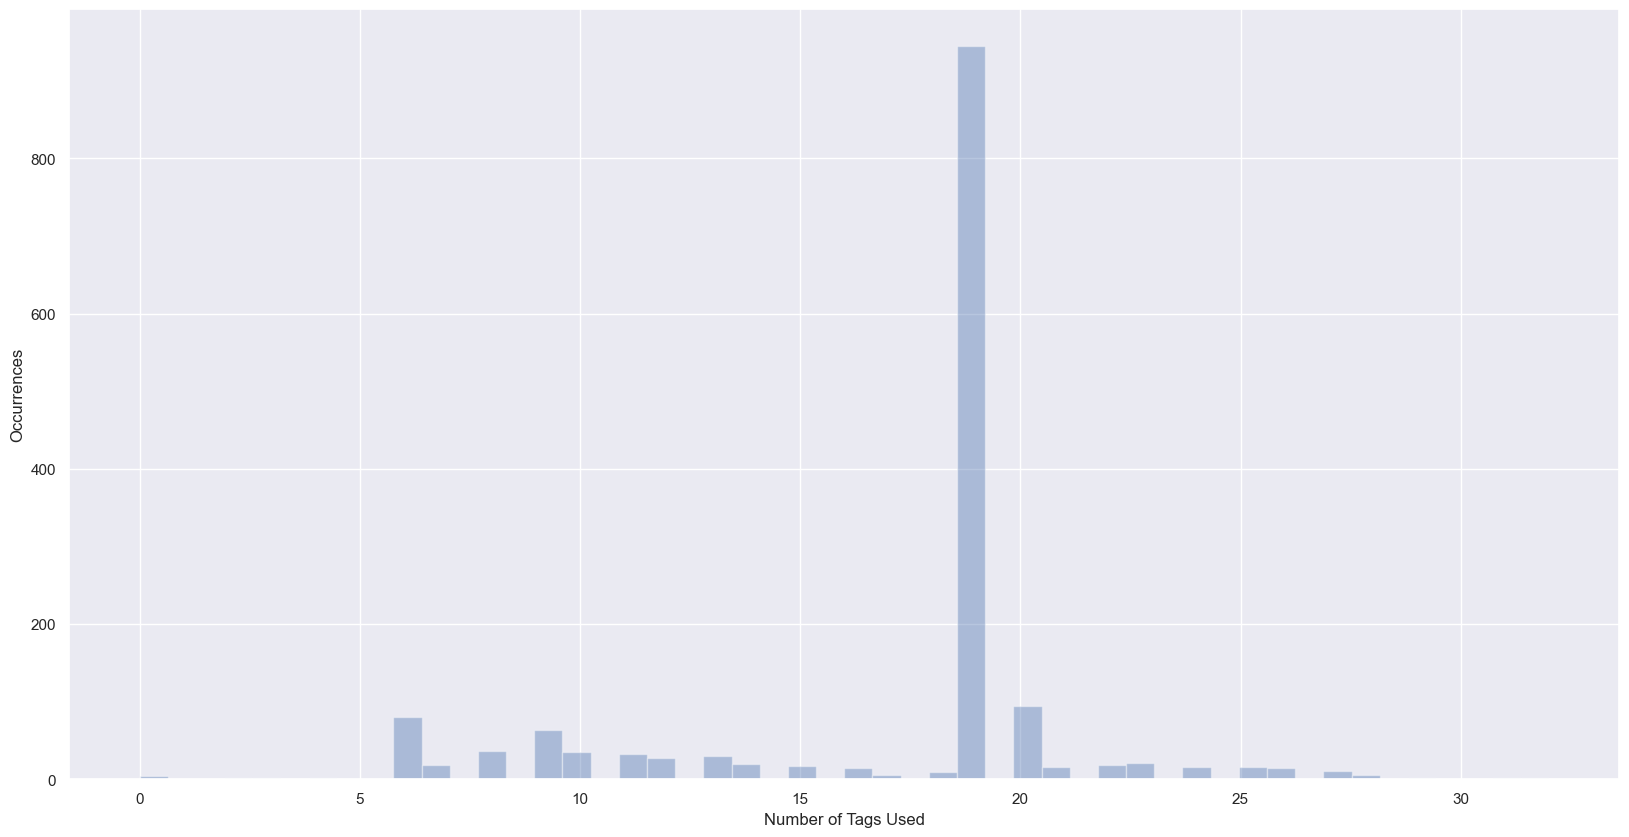

In [99]:
chart = sns.distplot( a=df["tag_count"], hist=True, kde=False, rug=False )
chart.set(xlabel='Number of Tags Used', ylabel='Occurrences')

In [82]:
df_highest_views = df.nlargest(10, 'view_count')
df_highest_views['title'] = df_highest_views['title'].str[:40]
df_highest_views['view_count_millions'] = df_highest_views['view_count'] / 1000000
df_highest_views

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions,view_count_millions
20,hi.,I do not condone or support any kind of online...,2023-06-28T19:24:48Z,19,16732843,153728,0,13233,3,180194,16.732843
1113,Finding out I'm Pregnant!,Make sure to watch the pregnancy reveal video ...,2018-06-29T20:30:00Z,22,11918830,368194,0,28347,25,424888,11.918830
1055,"My body Before, During and After Pregnan",Get my new lipstick! - http://mirandasingslips...,2018-12-21T03:22:38Z,20,9493401,224513,0,15210,43,254933,9.493401
1056,My pregnant belly right before birth,Get my new lipstick! - http://mirandasingslips...,2018-12-19T02:04:46Z,20,8737759,123023,0,6460,36,135943,8.737759
1060,Recovering at the hospital,I'm obsessed with my baby. \n\nGet my new lips...,2018-12-15T02:30:43Z,24,8563642,383844,0,36409,26,456662,8.563642
1059,Bringing my baby home!,Get my new lipstick! - http://mirandasingslips...,2018-12-16T01:02:01Z,20,7433040,325202,0,22392,22,369986,7.433040
1088,I'M IN A DISNEY MOVIE!,Hi friends! Thanks for watching my vlog! I lov...,2018-10-07T19:56:34Z,24,6255260,153461,0,13307,22,180075,6.255260
1072,PREPARING FOR THE BIRTH!,We had our first birthing class... I had an in...,2018-11-29T06:25:29Z,26,5429224,109053,0,11210,24,131473,5.429224
1051,BABY'S FIRST CHRISTMAS!,Get my new lipstick! - http://mirandasingslips...,2018-12-26T23:45:46Z,20,5161529,134123,0,7437,23,148997,5.161529
1061,it's happening... 😏,Get my new lipstick! - http://mirandasingslips...,2018-12-10T20:24:38Z,20,4430733,132272,0,13960,19,160192,4.430733


In [84]:
# Most Interations ( Like + Dislikes + Comments)
df_highest_reactions = df.nlargest(10, 'reactions')
df_highest_reactions['title'] = df_highest_reactions['title'].str[:40]
df_highest_reactions['reactions'] = df_highest_reactions['reactions'] / 1000
df_highest_reactions

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
1060,Recovering at the hospital,I'm obsessed with my baby. \n\nGet my new lips...,2018-12-15T02:30:43Z,24,8563642,383844,0,36409,26,456.662
1113,Finding out I'm Pregnant!,Make sure to watch the pregnancy reveal video ...,2018-06-29T20:30:00Z,22,11918830,368194,0,28347,25,424.888
1059,Bringing my baby home!,Get my new lipstick! - http://mirandasingslips...,2018-12-16T01:02:01Z,20,7433040,325202,0,22392,22,369.986
606,My Miscarriage,TW: This video is about my experience with Pre...,2021-02-08T17:00:16Z,11,3388293,234651,0,31530,14,297.711
870,addressing everything,addressing everything,2020-05-12T23:14:03Z,2,4011253,228754,0,26739,21,282.232
1055,"My body Before, During and After Pregnan",Get my new lipstick! - http://mirandasingslips...,2018-12-21T03:22:38Z,20,9493401,224513,0,15210,43,254.933
366,BRINGING MAISY HOME!!!,Check Out My Merch! - https://fanjoy.co/collec...,2021-12-21T18:00:11Z,19,3099790,194367,0,25027,22,244.421
404,What I Didn't Show You From The Twins Bi,Watch the twins' birth - https://www.youtube.c...,2021-11-11T16:00:04Z,19,3338730,174425,0,12672,46,199.769
1058,Drinking my breast milk!,Get my new lipstick! - http://mirandasingslips...,2018-12-17T05:09:39Z,20,4091817,155883,0,12983,24,181.849
20,hi.,I do not condone or support any kind of online...,2023-06-28T19:24:48Z,19,16732843,153728,0,13233,3,180.194


Her Least Interacted videos occured before her channel had the opportunity to blossom, or initially after an apology video.

In [100]:
# Least Interations ( Like + Dislikes + Comments)
df_least_reactions = df.nsmallest(10, 'reactions')
df_least_reactions['title'] = df_least_reactions['title'].str[:40]
df_least_reactions['reactions'] = df_least_reactions['reactions'] / 1000
df_least_reactions

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
1388,BIRTHDAY LIVE STREAM!,I trust you guys more than anyone so I need to...,2016-09-11T01:31:13Z,0,0,1,0,0,21,0.001
1430,Song for Bailey Jacob and Parker!,This song is for my niece Bailey and nephews p...,2016-07-12T02:28:52Z,6,229070,0,0,106,33,0.212
1420,LAST NIGHT IN VANCOUVER! LIVE STREAM!,Subscribe to my vlogging channel! - https://ww...,2016-07-26T07:13:24Z,9,60826,3547,0,329,37,4.205
1303,the most boring live stream,I NEED YOUR HELP! \nSubscribe to my vlogging c...,2017-02-20T23:25:38Z,9,71546,3807,0,261,27,4.329
1216,Revealing all the Haters Back Off secret,Watching episode 6 of Haters Back Off together...,2017-10-11T04:06:53Z,9,89819,3582,0,421,42,4.424
1119,procrastination,Hi friends! Thanks for watching my vlog! I lov...,2018-05-29T22:13:00Z,0,79327,4060,0,269,15,4.598
0,MARSHALLS HAUL! KIDS BIRTHDAY & CHRISTMA,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-10T22:00:34Z,25,63400,4517,0,221,51,4.959
1450,SLUMBER PARTY LIVE STREAM!,HI LETS HAVE A SLUMBER PARTYYYY\n\nSubscribe t...,2016-06-19T08:13:52Z,9,81369,4015,0,532,26,5.079
1163,LIVE STREAM CHRISTMAS PARTY!,Hi friends! Thanks for watching my vlog! I lov...,2017-12-23T02:11:33Z,7,139955,4609,0,379,28,5.367
1444,I LOVE YOU! Live stream,hi! I just wanna say I love you. \n\nSubscribe...,2016-06-27T06:36:50Z,9,80142,4368,0,509,23,5.386


In [87]:
df_highest_disliked = df.nlargest(10, 'dislike_count')
df_highest_disliked['title'] = df_highest_disliked['title'].str[:40]
df_highest_disliked['dislike_count'] = df_highest_disliked['dislike_count'] / 1000
df_highest_disliked

,title,description,published,tag_count,view_count,like_count,dislike_count,comment_count,title_length,reactions
0,MARSHALLS HAUL! KIDS BIRTHDAY & CHRISTMA,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-10T22:00:34Z,25,63400,4517,0.0,221,51,4959
1,Christmas Lights & Home Renovation Plans,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-08T22:10:18Z,22,97191,5547,0.0,384,40,6315
2,TIKTOK CHAMOY PICKLE TASTE TEST!,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-07T22:12:15Z,23,92553,5894,0.0,431,32,6756
3,I GOT SO MANY COMMENTS LIKE THIS! 😩,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-07T00:10:12Z,19,120521,6727,0.0,684,35,8095
4,TAYLOR SWIFT COPIED ME!,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-05T21:54:18Z,24,95598,6036,0.0,565,23,7166
5,The Last Miranda Shows,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-04T22:37:59Z,19,167093,8026,0.0,554,22,9134
6,I FINALLY FINISHED MY ROCKS & CRYSTALS!,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-04T00:09:18Z,19,95031,6332,0.0,485,39,7302
7,My Kids Think I'm Zendaya...,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-02T22:34:58Z,26,109350,7013,0.0,583,28,8179
8,Taylor Swift Advent and Flynn's Stand Up,Donate to Colleen Ballinger's Childhood Cancer...,2023-12-01T21:22:27Z,19,113186,7675,0.0,745,48,9165
9,I'm scared... is this Poisonous? 😩,Donate to Colleen Ballinger's Childhood Cancer...,2023-11-30T21:34:19Z,23,116496,6985,0.0,793,34,8571
